In [58]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [59]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-03-17-00-55-52', '2024-03-17-10-41-24','2024-03-17-20-00-08']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [60]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 168/168 [00:01<00:00, 103.72it/s]


,environment_steps,Training/Value_and_Policy_loss,Self_Play/Mean_Return,Training/Regularization_loss,Self_Play/Total_Mean_Return,_wandb,_timestamp,Self_Play/Returns,Training/Value_Simularities,Self_Play/Cumulative_Return,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,12068,0.427721,0.000000,131.982697,0.116667,{'runtime': 1529},1.710725e+09,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",0.652979,3.500000,...,0.3,1,zero_one,coordinate,0.0001,PUCT,6,mvto,10,identity
1,11666,0.359251,0.500000,152.697800,0.050000,{'runtime': 4998},1.710728e+09,"{'bins': [0, 0.015625, 0.03125, 0.046875, 0.06...",0.841449,1.500000,...,0.3,1,zero_one,coordinate,0.0001,PolicyPUCT,6,mvto,10,identity
2,13399,0.387203,0.000000,122.845734,0.000000,{'runtime': 948},1.710724e+09,"{'_type': 'histogram', 'bins': [-0.5, -0.48437...",0.050974,0.000000,...,0.3,1,zero_one,coordinate,0.0001,PUCT,6,mvto,10,identity
3,15292,0.341258,0.000000,118.250381,0.000000,{'runtime': 1091},1.710724e+09,"{'_type': 'histogram', 'bins': [-0.5, -0.48437...",0.127120,0.000000,...,0.3,1,zero_one,coordinate,0.0001,PolicyPUCT,6,mvto,10,identity
4,11959,0.465810,0.000000,132.870071,0.005556,{'runtime': 3279},1.710723e+09,"{'bins': [-0.5, -0.484375, -0.46875, -0.453125...",0.639264,0.166667,...,0.3,1,zero_one,coordinate,0.0001,PUCT,6,mvto,10,identity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,14929,14.545679,38.000000,296.859985,82.938889,{'runtime': 190},1.710634e+09,"{'_type': 'histogram', 'bins': [18, 18.59375, ...",0.147612,2488.166670,...,0.3,1,identity,default,0.0001,PUCT,6,mvc,10,identity
164,15626,116.804518,219.833328,261.852631,86.811111,{'runtime': 1284},1.710635e+09,"{'_type': 'histogram', 'bins': [133, 135.60937...",0.673523,2604.333327,...,0.3,1,identity,default,0.0001,PUCT,6,visit,10,identity
165,17190,17.696991,295.333344,303.751495,95.499999,{'runtime': 313},1.710634e+09,"{'_type': 'histogram', 'bins': [272, 272.4375,...",0.311178,2864.999980,...,0.3,1,identity,default,0.0001,PolicyPUCT,6,mvc,10,identity
166,13209,13.332836,121.500000,232.569885,73.383334,{'runtime': 955},1.710634e+09,"{'_type': 'histogram', 'bins': [98, 99, 100, 1...",0.748630,2201.500010,...,0.3,1,identity,default,0.0001,PUCT,6,mvc,10,identity


In [61]:
df.columns

Index(['environment_steps', 'Training/Value_and_Policy_loss',
       'Self_Play/Mean_Return', 'Training/Regularization_loss',
       'Self_Play/Total_Mean_Return', '_wandb', '_timestamp',
       'Self_Play/Returns', 'Training/Value_Simularities',
       'Self_Play/Cumulative_Return', 'Self_Play/EMA_Return', '_step',
       'Self_Play/Max_Return', 'Training/Policy_loss', 'Training/Value_loss',
       'Self_Play/Discounted_Return', 'Training/Learning_Rate',
       'Self_Play/Min_Timesteps', 'Self_Play/Timesteps',
       'Self_Play/Total_Timesteps', 'Self_Play/Min_Return', 'grad_steps',
       'Self_Play/Mean_Discounted_Return', 'Self_Play/Mean_Entropy',
       'Training/Replay_Buffer_Size', 'Self_Play/Entropies', '_runtime',
       'Self_Play/Mean_Timesteps', 'episodes', 'ncols', 'layers', 'puct_c',
       'workers', 'lr_gamma', 'dir_alpha', 'env_params', 'eval_param',
       'hidden_dim', 'iterations', 'model_type', 'norm_layer', 'dir_epsilon',
       'activation_fn', 'learning_rate', '

In [62]:
df.discount_factor.unique()


array([0.9, 1. ])

In [63]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

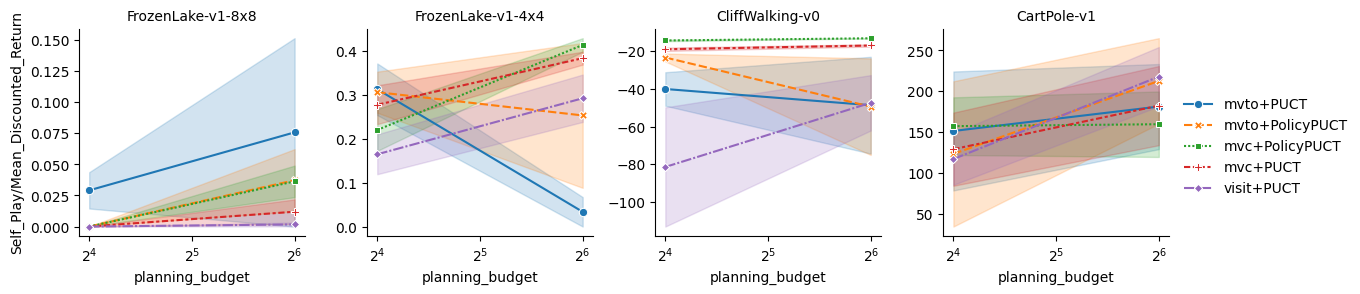

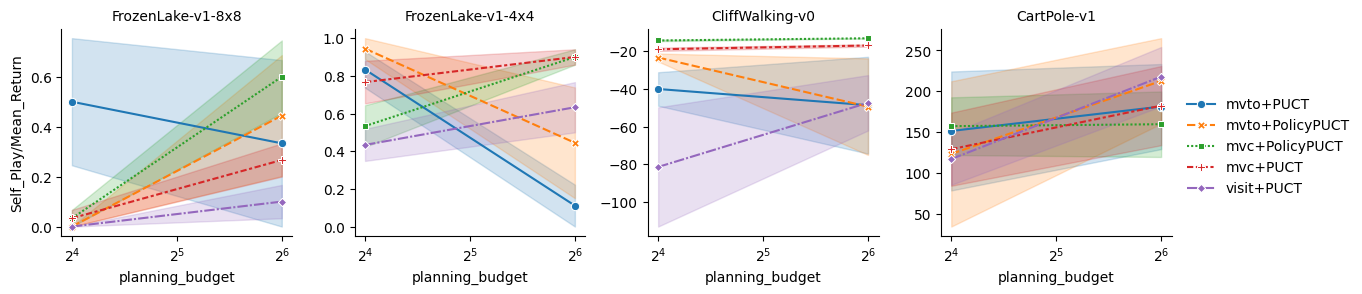

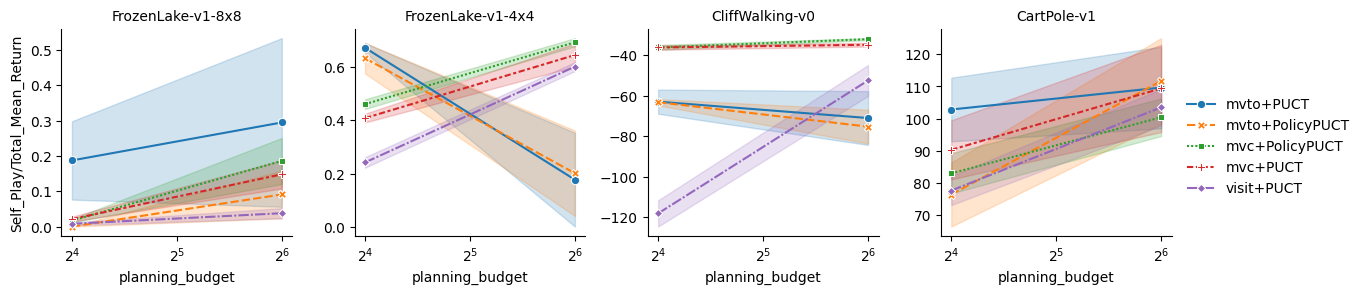

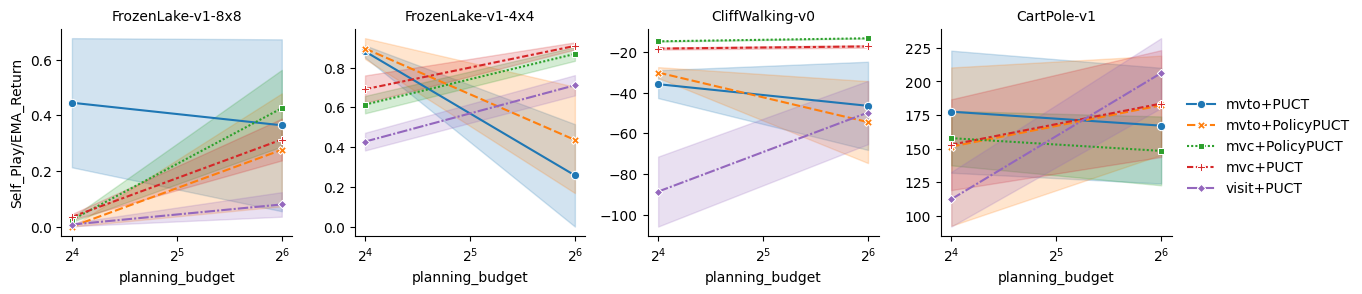

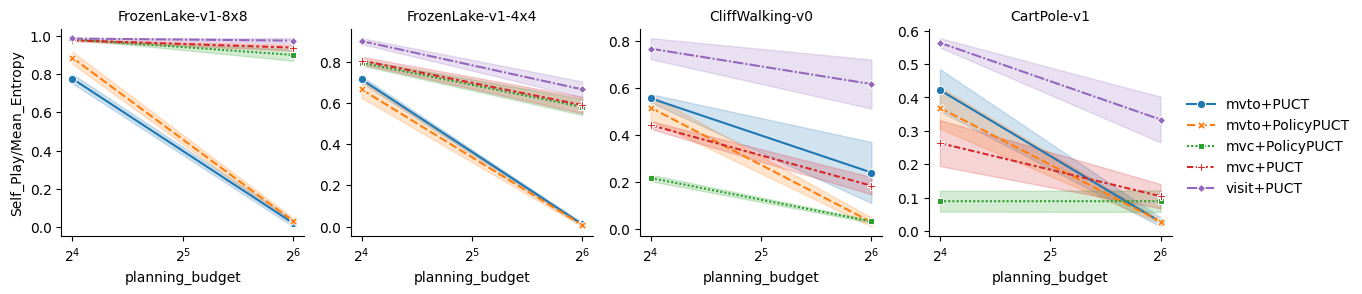

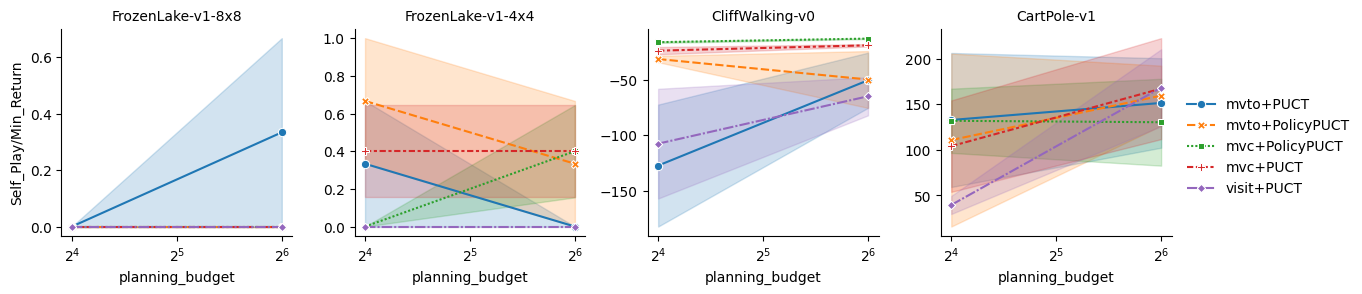

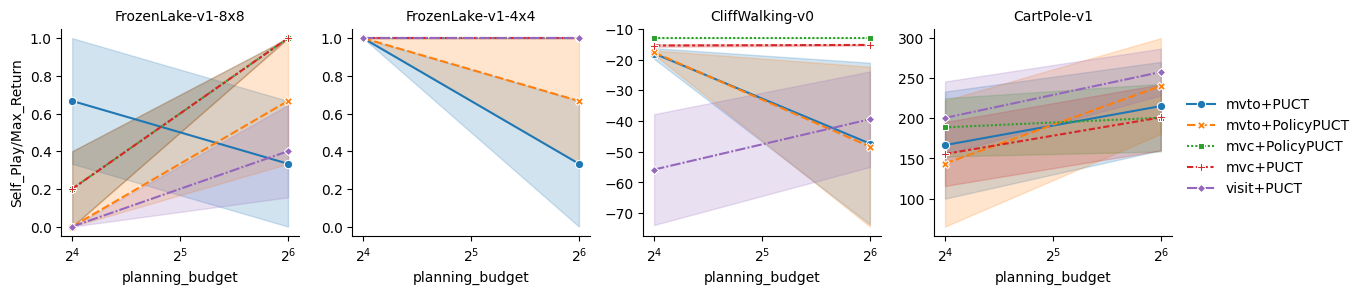

In [64]:



df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', "Self_Play/Total_Mean_Return", "Self_Play/EMA_Return", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Return',
           'Self_Play/Max_Return',]


estimator = "mean"
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(df, col="env_description",sharex=True, sharey=False)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    for ax in g.axes.flatten():
        ax.set_xscale('log', base=2)

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()

    # Set the titles for each subplot for clarity
    g.set_titles("{col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()